<a href="https://colab.research.google.com/github/A-sy-coding/midterm_homeowrk/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peguins 데이터를 이용해 species 예측

* 깃허브에서 데이터 받아오기

In [1]:
! git clone 'https://github.com/mwaskom/seaborn-data.git'

fatal: destination path 'seaborn-data' already exists and is not an empty directory.


In [2]:
! ls -l ./seaborn-data

total 5132
-rw-r--r-- 1 root root     361 Nov  1 02:58 anagrams.csv
-rw-r--r-- 1 root root     556 Nov  1 02:58 anscombe.csv
-rw-r--r-- 1 root root    1198 Nov  1 02:58 attention.csv
-rw-r--r-- 1 root root 1075911 Nov  1 02:58 brain_networks.csv
-rw-r--r-- 1 root root    3301 Nov  1 02:58 car_crashes.csv
-rw-r--r-- 1 root root 2772143 Nov  1 02:58 diamonds.csv
-rw-r--r-- 1 root root   25742 Nov  1 02:58 dots.csv
-rw-r--r-- 1 root root    2735 Nov  1 02:58 exercise.csv
-rw-r--r-- 1 root root    2350 Nov  1 02:58 flights.csv
-rw-r--r-- 1 root root   38329 Nov  1 02:58 fmri.csv
-rw-r--r-- 1 root root  258401 Nov  1 02:58 gammas.csv
-rw-r--r-- 1 root root    4199 Nov  1 02:58 geyser.csv
-rw-r--r-- 1 root root    3858 Nov  1 02:58 iris.csv
-rw-r--r-- 1 root root   21222 Nov  1 02:58 mpg.csv
-rw-r--r-- 1 root root   13478 Nov  1 02:58 penguins.csv
-rw-r--r-- 1 root root   36263 Nov  1 02:58 planets.csv
drwxr-xr-x 2 root root    4096 Nov  1 02:58 png
drwxr-xr-x 2 root root    4096 Nov  1 02:5

In [53]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함 --> 폰트 다운

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

 펭귄의 부리길이(Bill Length)와 두께(Bill Depth)를 측정하는 방법 

 부리의 길이가 길고 두께가 두꺼우면 수컷이고 작으면 암컷인 경우가 많다는 점을 이용

# 데이터 불러오기

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 깨짐 방지 --> 폰트를 아까전 다운 받은 폰트로 변경
mpl.rc('font', family='NanumBarunGothic') 
mpl.rc('axes',unicode_minus = False)

data = pd.read_csv('./seaborn-data/penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# 데이터 살펴보기
print('펭귄의 종류 : ', data['species'].unique())
print('펭귄 서식지 : ', data['island'].unique())

펭귄의 종류 :  ['Adelie' 'Chinstrap' 'Gentoo']
펭귄 서식지 :  ['Torgersen' 'Biscoe' 'Dream']


In [5]:
# 데이터 크기 --> 6개의 특징 벡터와 1개의 타깃 벡터로 이루어져 있으며, 344개의 데이터를 가지고 있다.
print('데이터 크기 :',data.shape)

데이터 크기 : (344, 7)


In [6]:
# 결측값 확인하기
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# 결측값이 있는 데이터 확인해보기 
data[data['sex'].isnull()]

###################
# nan으로 되어있는 값들을 확인해 보면, 임의로 채워 놓을 수가 없으므로 해당 데이터들을 제거하는 방향으로 잡는다.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [8]:
# 결측치 처리
data.dropna(inplace = True) # 실제 데이터가 변하게끔 만든다.
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# 데이터 정보 확인
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [10]:
# 데이터 살펴보기
data.describe()

########################

# 데이터를 확인해보면 body_mass_g부분에서 75%~max 부분에서 값의 차이가 조금 나는 것을 확인할 수 있다.
# 분산이 커서 넓게 퍼져있음을 알 수 있다.

# 값의 차이가 많이 난다고 판단되면 데이터 정규화룰 통해 차이를 완화시킬 수 있다.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
# 데이터의 상관관계 파악해보기
data.corr()

###############
# 상관관계를 분석해보면, 
# bill_length는  ( flipper_length_mm , body_mass_g )와 양의 상관관계를 가지고 있고,
# bill_depth_mm는 ( flipper_length_mm , body_mass_g )와 음의 상관관계를 가지고 있다.
# flipper_length_mm는 ( bill_length_mm , body_mass_g )와는 양의 상관관계를 가지고 있고, bill_depth_mm과는 음의 상관관계를 가지고 있다.
# body_mass_g는 (  bill_length_mm , flipper_length_mm )와는 양의 상관관계를 가지고 있고, bill_depth_mm과는 음의 상관관계를 가지고 있다.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


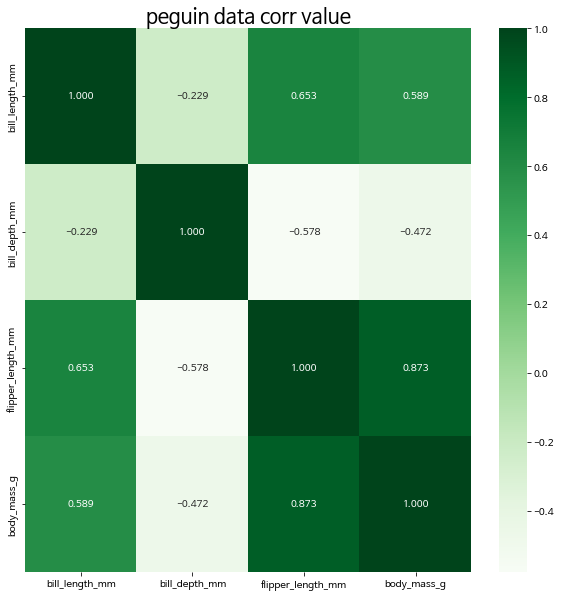

In [12]:
# 위에서 구한 상관관계를 히트맵으로 좀 더 보기 쉽게 시각화
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), annot=True, fmt='.3f',cmap="Greens")

plt.title('peguin data corr value', fontsize=20)
plt.show()

# 데이터 시각화

In [13]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


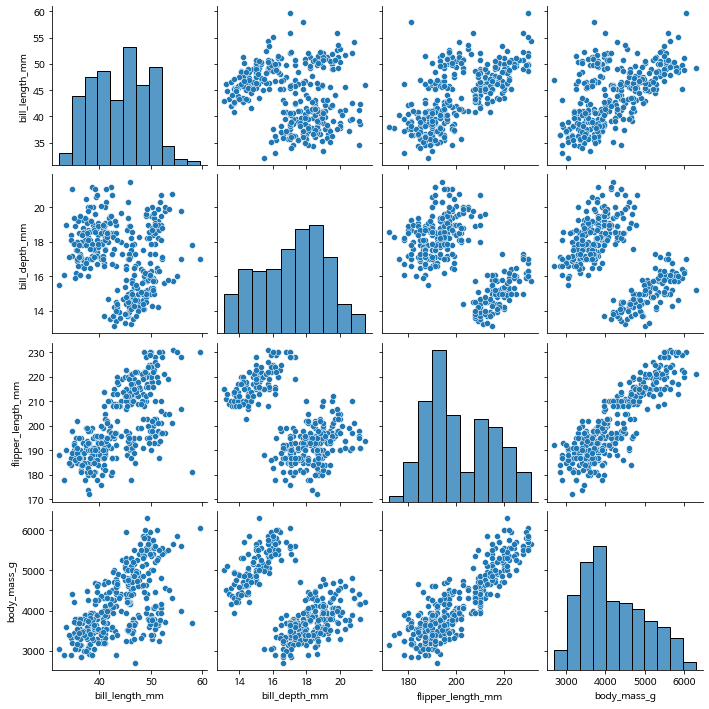

In [14]:
# 각 변수의 쌍을 비교할 수 있는 그래프 그리기
sns.pairplot(data)

#########################
# 각 변수끼리의 산점도를 보면,
# (bill_length_mm , flipper_length_mm ) , (bill_length_mm , body_mass_g ) 가 어느정도 서로 관계가 있다고 판단할 수 있고,
# (flipper_length_mm , body_mass_g )가 서로 관계가 있다고 판단할 수 있다.

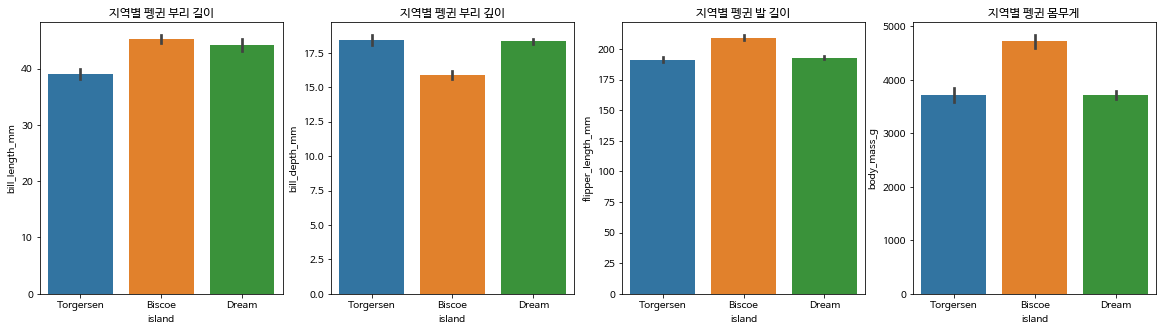

In [15]:
# 지역별로 펭귄이 특징이 구분이 되는가?

fig,axes = plt.subplots(1,4,figsize=(20,5))

for i,j in enumerate(range(2,6)):
  sns.barplot(data=data, y = data.columns[j], x = 'island', ax=axes[i])

axes[0].set_title('지역별 펭귄 부리 길이')
axes[1].set_title('지역별 펭귄 부리 깊이')
axes[2].set_title('지역별 펭귄 발 길이')
axes[3].set_title('지역별 펭귄 몸무게 ')
plt.show()

#########################
# 그래프를 확인해보면, 
# bill_length_mm의 경우는 Torgersen 지역에서 낮게 나타나는 경향을 보인다.
# bill_depth_mm의 경우는 Biscoe 지역에서 낮게 나타나는 경향을 보인다.
# flipper_length_mm의 경우에는 Biscoe 지역에서 높게 나타나는 경향을 보인다.
# body_mass_g의 경우에는 Biscoe 지역에서 높게 나타나는 경향을 보인다.

# 즉, 위에서 파악한 내용들을 간단히 정리해 보면,
# Biscoe 지역의 펭귄들은 부리 길이와 발 길이가 길고, 부리 깊이가 짧으며 몸무게는 많이 나간다는 것을 알 수 있다.
# Torgersen 지역의 펭귄들은 부리 길이가 짧고, 부리 깊이가 깊으며, 발 길이는 평균이고, 몸무게는 적게 나간다는 것을 알 수 있다.
# Dream 지역의 펭귄들은 부리 길이가 길고, 부리 깊이가 깊고, 발 길이는 평균이며, 몸무게가 적게 나간다는 것을 알 수 있다.

# Biscoe 지역의 펭귄들은 몸무게에 영향을 많이 받을 것이고, Torgersen 지역과 Dream 지역은 부리 길이를 통해 구별할 수 있다고 판단할 수 있다.

In [16]:
# 종별로 나머지 특징들에 대해 차이가 있는가?

# 종별로 각 수치형 특징들의 평균 구해보기
data.groupby('species').mean()

######################
# 평균을 비교해보면, 
# Gentoo 종의 경우, bill_depth_mm의 값이 작고, flipper_length_mm 과 body_mass_g의 값은 큰 경향을 보이고 있다.
# Adelie 와 Chinstrap 종의 경우, bill_depth_mm, flipper_length_mm, body_mass_g의 값은 거의 차이가 없고, bill_length_mm 값에서 조금 차이를 보이고 있음을 확인할 수 있다.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [17]:
# 종별로 특징들의 산점도를 보여주는 함수 구현
def get_scatter(data , x , y, axes , row, col):
  
  markers = ['^','s','o']
  species = data.species.unique()

  for i, marker in enumerate(markers):
      x_axis = data[data['species']== species[i]][x]
      y_axis = data[data['species'] == species[i]][y]
      axes[row,col].scatter(x_axis, y_axis, marker=marker, label = species[i])

  axes[row,col].legend()
  axes[row,col].set_xlabel(x)
  axes[row,col].set_ylabel(y)

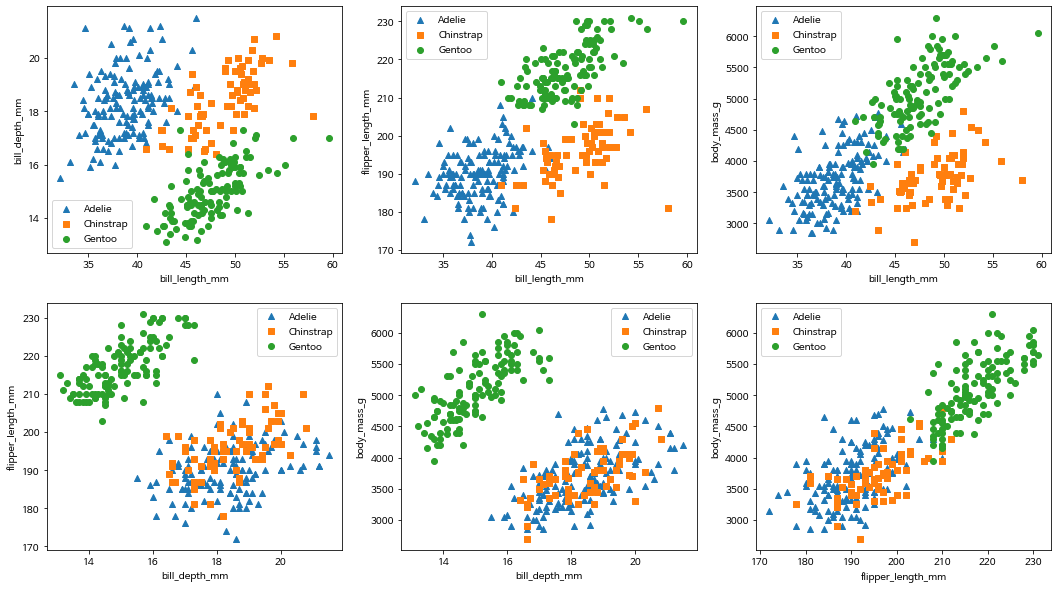

In [18]:
# 종별로 나머지 특징들에 대해 차이가 있는가?

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

for k,i in enumerate(range(len(columns)) ):
  for r,j in enumerate(range(i+1, len(columns)) ):

    if(k==2 and r==0):
      k = k-1
      r = r+2
    get_scatter( data, columns[i] , columns[j],axes, k, r)
    
###################################

# 산점도를 분석해보면,
# (bill_length_mm , bill_depth_mm) , (bill_length_mm , flipper_length_mm) , (bill_length_mm , body_mass_g)의 경우에는 펭귄의 종을 잘 분류할 수 있음을 볼 수 있지만,
# (bill_depth_mm , flipper_length_mm) , (bill_depth_mm , body_mas_g) , (flipper_length_mm , body_mass_g) 의 경우에는 Chinstrap와 Adelie 종을 잘 분류하지 못함을 확인할 수 있다.

In [ ]:
# # 종별로 특징들의 산점도를 보여주는 함수 구현
# def get_species_scatter(data , x , y):
  
#   markers = ['^','s','o']
#   species = data.species.unique()

#   for i, marker in enumerate(markers):
#       x_axis = data[data['species']== species[i]][x]
#       y_axis = data[data['species'] == species[i]][y]
#       plt.scatter(x_axis, y_axis, marker=marker, label = species[i])

#   plt.legend()
#   plt.xlabel(x)
#   plt.ylabel(y)
#   plt.show()

In [ ]:
# # 종별로 나머지 특징들에 대해 차이가 있는가?

# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

# for i in range(len(columns)):
#   for j in range(i+1, len(columns)):
#     get_species_scatter( data, columns[i] , columns[j])

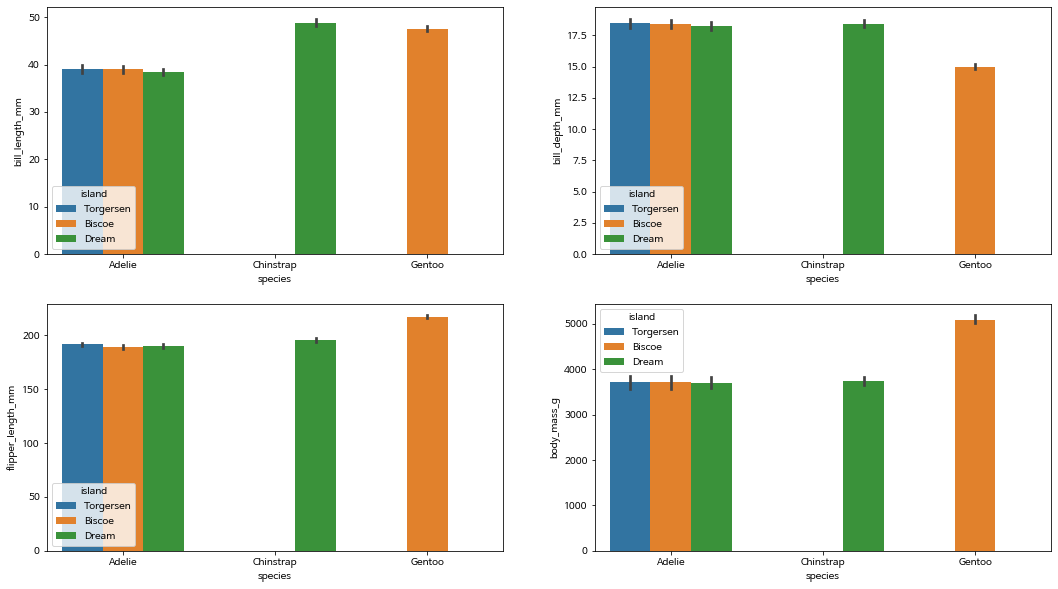

In [19]:
# 종을 예측하는데 가장 큰 영향을 미치는 변수가 무엇인가?

# 종/지역별 수치형 변수들의 그래프
columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i,j ,col in zip([0,0,1,1], [0,1,0,1] ,columns):
  sns.barplot(data=data, x='species', y=col ,hue='island', ax=axes[i,j])

##########################

# Gentoo 종은 Biscoe 지역에서만 서식한다.
# Chimstrap 종은  Dream 지역에서만 서식한다.
# Adelie 종은 모든 지역에서 전부 서식한다.
# 종은 지역에 영향을 많이 받는다고 판단할 수 있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


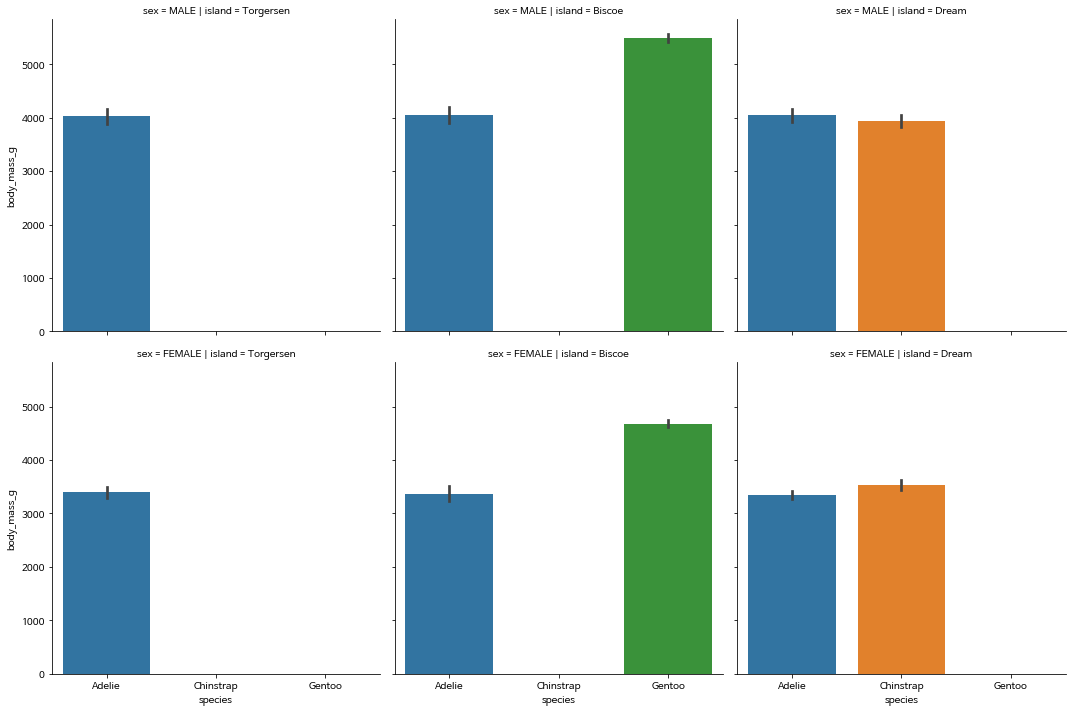

In [20]:
# 여러 범주형 변수들을 한꺼번에 비교해 시각화하기
sns.factorplot(data = data , x = 'species' , y = 'body_mass_g', row='sex' , col = 'island', kind = 'bar')
plt.show()

####################
# 여러 범주형 변수들과 body_mass_g를 비교한 그래프를 확인하면,
# 성별에 따라서는 남자가 좀 더 무겁고, 여자가 좀 더 가볍다는 것을 알 수 있고, 
# 지역에 따라 존재하는 종이 달라진다는 것을 알 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

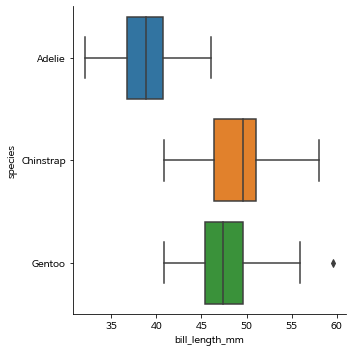

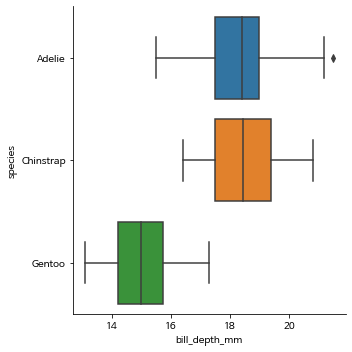

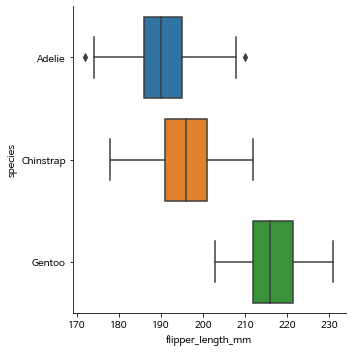

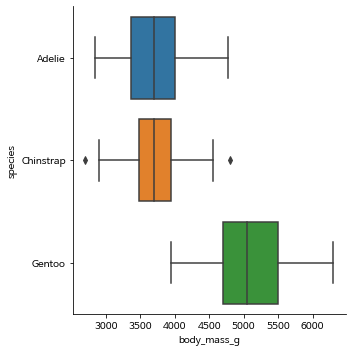

In [21]:
# 펭귄의 종별 수치형 변수들의 상자 그래프

columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

for col in columns:
  sns.factorplot(data = data , x = col , y = 'species', kind = 'box' )

#####################33
# 상자 그림을 통해 평균과 분산의 관계를 대략적으로 파악할 수 있고 펭귄의 종류에 따라 펭귄의 특징들이 어떻게 차이가 나는지 확인할 수 있다.

# 데이터 전처리

In [ ]:
# 펭귄의 종을 예측하는것이 목표이고, 펭귄의 종은 str형태로 이루어져 있기 때문에 label encoding을 통해 문자형을 숫자형으로 변경시켜준다.
# 또한, 데이터의 분포의 차이가 많이 나는 경우에는 데이터 스케일링을 통해 표준화 시켜주는 방법을 사용한다.

In [22]:
data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# species를 숫자 데이터로 라벨링한다.
encoder = LabelEncoder()
trans_data = encoder.fit_transform(data['species'])
data['species'] = trans_data
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [24]:
# 인코딩하기 전 라벨의 이름들을 출력한다.
encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [25]:
# species의 분포 정도를 확인한다.
data['species'].value_counts()

##############################
# 분포를 살펴보면 Adelie와 Gentoo는 크게 차이가 없지만, Chinstrap은 차이가 남을 알 수 있다.
# 따라서 훈련데이터와 테스트 데이터를 나눌 때 각 데이터가 한쪽으로 치우치는것을 방지하기 위해 각 클래스별로 비율을 일정하게 하여 분할한다.

0    146
2    119
1     68
Name: species, dtype: int64

In [26]:
# feature와 target값 정의
X = data.drop('species',axis=1)
y = data['species']

In [27]:
# 훈련데이터와 테스트 데이터 나누기
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size= 0.2 , shuffle=True, stratify=y , random_state = 0)
x_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
201,Dream,49.8,17.3,198.0,3675.0,FEMALE
112,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
38,Dream,37.6,19.3,181.0,3300.0,FEMALE
116,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
299,Biscoe,45.2,16.4,223.0,5950.0,MALE
...,...,...,...,...,...,...
18,Torgersen,34.4,18.4,184.0,3325.0,FEMALE
175,Dream,50.6,19.4,193.0,3800.0,MALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Autokeras

In [28]:
# !pip install autokeras

* autokeras는 데이터 타입의 영향을 받지 않고, 특성들의 데이터가 문자형이여도 작동이 된다.

In [29]:
# 필요한 라이브러리 
import tensorflow as tf
import autokeras as ak

In [30]:
# autokeras에서 풀어야 하는 task에 맞는 객체 호출 --> StructureDataClassifier 사용

# 객체 호출
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=10)  

# 모델 학습 --> 학습의 횟수를 15번으로 설정
clf.fit(x_train, y_train, epochs=15)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 41s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
9/9 [==============================] - 1s 3ms/step - loss: 0.7624 - accuracy: 0.8195
Epoch 2/15
9/9 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.8233
Epoch 3/15
9/9 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.8346
Epoch 4/15
9/9 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.8459
Epoch 5/15
9/9 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8496
Epoch 6/15
9/9 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8647
Epoch 7/15
9/9 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8872
Epoch 8/15
9/9 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.9135
Epoch 9/15
9/9 [==============================] - 0s 3ms/step - loss: 0.2396 - ac

In [31]:
# loss값과 accuracy값 출력하기
loss , accuracy = clf.evaluate(x_test, y_test)
print('loss 값은  : {:.3f}'.format(loss))
print('accuracy 값은  : {:.3f}'.format(accuracy))

3/3 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9701
loss 값은  : 0.115
accuracy 값은  : 0.970


In [32]:
# 가장 좋은 성능을 낸 모델 저장 
model = clf.export_model()
model.summary()  # 모델을 구성하는 layer 파악

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 6)                 0         
_________________________________________________________________
normalization (Normalization (None, 6)                 13        
_________________________________________________________________
dense (Dense)                (None, 32)                224       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test.astype(np.unicode))  # 각 클래스의 확률이 출력된다.
pred = np.argmax(y_pred, axis=1) # 확률이 가장 높은 인덱스를 추출하여 pred에 저장

# confusion matrix 출력하기
confusion_matrix(y_test, pred)  # 1개만을 오분류 함을 확인할 수 있다.

array([[28,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 24]])

# Keras 사용

In [34]:
x_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
201,Dream,49.8,17.3,198.0,3675.0,FEMALE
112,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
38,Dream,37.6,19.3,181.0,3300.0,FEMALE
116,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
299,Biscoe,45.2,16.4,223.0,5950.0,MALE


In [35]:
# 정형데이터에 신경망 모델을 사용하면 원래 머신러닝 모델보다는 낮은 성능을 보인다.
# autokeras는 문자형 변수들도 자동으로 처리해주었지만, 실제 딥러닝 모델에 넣기 위해서는 데이터 전처리 과정이 필요하다.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

scaling_label = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
onehot_label = ["island", "sex"]

# 원하는 열들만 작업하기
pipe = ColumnTransformer(transformers=[ ("onehot", OneHotEncoder(sparse=False), onehot_label),
                                        ("scaling", StandardScaler(), scaling_label)] )

pipe.fit(x_train)  # scaling의 경우는 훈련데이터에서 학습한 정규화를 유지하여야 한다. 때문에 테스트 데이터는 훈련데이터에서 학습한 것을 그대로 유지한채 적용해야한다.

# 원핫인코딩과 스케일링 적용하기
x_train = pipe.transform(x_train)
x_test = pipe.transform(x_test)

In [36]:
num_epochs = 15
batch_sizes = [16,32,64] # 최적의 하이퍼파리미터를 찾기 위해 임의로 리스트에 저장

In [37]:
from tensorflow.keras import layers, models

# 모델 층 쌓기 --> 2개의 은닉층 사용 --> 데이터의 개수가 적기 때문에 과대적합을 방지하기 위해 작은 신경망으로 구성
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))  # 모델은 (*, 9) 형태의 배열을 인풋으로 받고 , (*, 32) 형태의 배열을 출력합니다
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(3 , activation = 'softmax'))
  model.compile(optimizer = 'Adam' , loss='categorical_crossentropy', metrics = 'acc')

  return model

In [38]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [39]:
# k겹 검증을 이용해 모델 평가
from tensorflow.keras.utils import to_categorical
import numpy as np

k = 4   
n_samples = len(x_train)//k
losses = []
scores = []

# with tf.device('/gpu:0'):
for batch_size in batch_sizes:
  for i in range(k):
  
    # 검증데이터 생성
    x_valid = x_train[i * n_samples : (i+1) * n_samples]
    y_valid = y_train[i*n_samples : (i+1) * n_samples ]

    # 비교할 나머지 데이터 생성
    x_compare = np.concatenate([
                              x_train[:i * n_samples] , x_train[ (i+1)*n_samples: ]], axis=0)
    y_compare = np.concatenate([
                              y_train[:i * n_samples] , y_train[ (i+1)*n_samples: ]], axis=0)
  
    # 신경망 모델 생성
    model = build_model()
    model.fit(x_valid, to_categorical(y_valid, 3), epochs = num_epochs, batch_size = batch_size, verbose = 0)
    loss, accuracy = model.evaluate(x_compare, to_categorical(y_compare,3), verbose = 0) # verbose를 0으로 설정하여 추가적인 진행상황이 안나오게 한다.
  
    # 손실값과 정확도 저장
    losses.append(loss)
    scores.append(accuracy)
  
  print('batch_size가 {}일때 평균 손실값 : {:.3f}'.format(batch_size, np.mean(losses)))
  print('batch_size가 {}일때 평균 정확도 : {:.3f}'.format(batch_size, np.mean(scores)))
  print('\n========================================\n')
###############################
# target 데이터를 그냥 쓰면 오류가 발생하므로 원핫인코딩을 통해 target값을 세 개로 바꾸어야 한다.
# 또한, 각 batch_size의 평균 손실값과 평균 정확도를 살펴보면 batch_size가 16일 때 성능이 가장 높게 나오는것을 확인할 수 있다.

batch_size가 16일때 평균 손실값 : 0.105
batch_size가 16일때 평균 정확도 : 0.989


batch_size가 32일때 평균 손실값 : 0.214
batch_size가 32일때 평균 정확도 : 0.970


batch_size가 64일때 평균 손실값 : 0.290
batch_size가 64일때 평균 정확도 : 0.947




In [40]:
# 검증데이터를 이용해 batch_size=16일때 가장 좋은 성능을 낸다는 사실을 알았으므로,
# 매개변수는 가장 좋은 성능을 낸 모델을 사용하고 전체 훈련 데이터를 이용해 모델을 다시 학습한다.

# 전체 훈련데이터를 이용해 모델 학습하기
model = build_model()
history = model.fit(x_train, to_categorical(y_train, 3), epochs = 20, batch_size = 16, validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 16ms/step - loss: 0.9424 - acc: 0.8019 - val_loss: 0.7155 - val_acc: 0.9444
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6146 - acc: 0.8632 - val_loss: 0.4561 - val_acc: 0.8704
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4043 - acc: 0.8962 - val_loss: 0.2888 - val_acc: 0.9630
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.2555 - acc: 0.9670 - val_loss: 0.1765 - val_acc: 0.9815
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.1565 - acc: 0.9811 - val_loss: 0.1040 - val_acc: 0.9815
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.1030 - acc: 0.9906 - val_loss: 0.0628 - val_acc: 1.0000
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0650 - acc: 0.9953 - val_loss: 0.0417 - val_acc: 1.0000
Epoch 8/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0458 - acc: 0.9

In [41]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 195       
Total params: 4,995
Trainable params: 4,995
Non-trainable params: 0
_________________________________________________________________


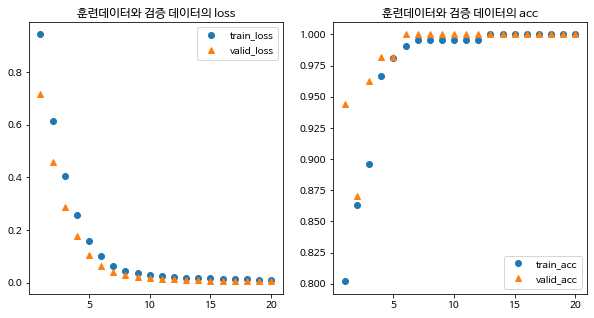

In [42]:
# 훈련 loss와 검증 loss 그래프 그려보기

loss = history.history['loss']
val_loss = history.history['val_loss']

acc =  history.history['acc']
val_acc =  history.history['val_acc']

epochs = range(1,len(loss)+1)

fig,axes = plt.subplots(1,2, figsize = (10,5))

axes[0].plot(epochs, loss, 'o', label = 'train_loss')
axes[0].plot(epochs, val_loss, '^', label='valid_loss')
axes[0].set_title('훈련데이터와 검증 데이터의 loss')
axes[0].legend()

axes[1].plot(epochs, acc, 'o', label = 'train_acc')
axes[1].plot(epochs, val_acc, '^', label='valid_acc')
axes[1].set_title('훈련데이터와 검증 데이터의 acc')
axes[1].legend()

In [43]:
# 오차 행렬 구하기
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test),axis=1)
confusion_matrix(y_test, y_pred)

########################
# 100%의 확률로 분류함을 확인할 수 있다.

array([[29,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 24]])